<a href="https://colab.research.google.com/github/ByronOG/machine-learning-project/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#article link: https://fivethirtyeight.com/features/where-police-have-killed-americans-in-2015/
#prediction: You are tasked to build a ML model to predict if the deceased is armed or not. 

import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

data='https://raw.githubusercontent.com/csbfx/cs133/main/police_killing.csv'
df = pd.read_csv(data)
police_drop=df.dropna()
police_drop

,age,gender,raceethnicity,month,year,city,state,latitude,longitude,lawenforcementagency,...,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,pov,urate,college
0,16,Male,Black,February,2015,Millbrook,AL,32.529577,-86.362829,Millbrook Police Department,...,60.5,30.5,5.6,28375,51367.0,54766,0.937936,14.1,0.097686,0.168510
1,27,Male,White,April,2015,Pineville,LA,31.321739,-92.434860,Rapides Parish Sheriff's Office,...,53.8,36.2,0.5,14678,27972.0,40930,0.683411,28.8,0.065724,0.111402
2,26,Male,White,March,2015,Kenosha,WI,42.583560,-87.835710,Kenosha Police Department,...,73.8,7.7,16.8,25286,45365.0,54930,0.825869,14.6,0.166293,0.147312
3,25,Male,Hispanic/Latino,March,2015,South Gate,CA,33.939298,-118.219463,South Gate Police Department,...,1.2,0.6,98.8,17194,48295.0,55909,0.863814,11.7,0.124827,0.050133
4,29,Male,White,March,2015,Munroe Falls,OH,41.148575,-81.429878,Kent Police Department,...,92.5,1.4,1.7,33954,68785.0,49669,1.384868,1.9,0.063550,0.403954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,18,Male,Black,April,2015,Portsmouth,VA,36.829014,-76.341438,Portsmouth Police Department,...,40.9,53.8,0,25262,27418.0,46166,0.593900,35.2,0.152047,0.120553
463,28,Male,Native American,April,2015,Tonasket,WA,48.708542,-119.436829,US Forest Service,...,74.5,0.4,20.2,18470,35608.0,40368,0.882085,27.3,0.133650,0.174525
464,52,Male,White,March,2015,Gaston,NC,35.205776,-81.240669,Gaston County Police Department,...,83.2,10.1,0.3,21175,38200.0,42017,0.909156,28.5,0.256150,0.072764
465,38,Female,Black,February,2015,Oakland,CA,37.827129,-122.284492,Emeryville Police Department,...,21.7,24.9,37.1,26971,63052.0,72112,0.874362,23.9,0.069601,0.396476


In [ ]:
police_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 0 to 466
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   465 non-null    object 
 1   gender                465 non-null    object 
 2   raceethnicity         465 non-null    object 
 3   month                 465 non-null    object 
 4   year                  465 non-null    int64  
 5   city                  465 non-null    object 
 6   state                 465 non-null    object 
 7   latitude              465 non-null    float64
 8   longitude             465 non-null    float64
 9   lawenforcementagency  465 non-null    object 
 10  cause                 465 non-null    object 
 11  armed                 465 non-null    object 
 12  pop                   465 non-null    int64  
 13  share_white           465 non-null    object 
 14  share_black           465 non-null    object 
 15  share_hispanic        4

In [ ]:
police_drop['age'].value_counts()


34    18
29    18
35    18
31    17
36    17
      ..
74     1
71     1
87     1
83     1
75     1
Name: age, Length: 61, dtype: int64

In [ ]:
df.describe()

,year,latitude,longitude,pop,h_income,county_income,comp_income,urate,college
count,467.0,467.000000,467.000000,467.000000,465.000000,467.000000,465.000000,465.000000,465.000000
mean,2015.0,36.403224,-96.972666,4783.719486,46627.182796,52527.331906,0.895913,0.117399,0.220217
std,0.0,5.193357,16.953842,2374.565749,20511.194907,12948.263811,0.333584,0.069175,0.158347
min,2015.0,19.915194,-159.642700,0.000000,10290.000000,22545.000000,0.184049,0.011335,0.013547
25%,2015.0,33.335240,-111.954636,3357.500000,32625.000000,43804.000000,0.645365,0.068592,0.106167
50%,2015.0,35.769779,-94.761902,4447.000000,42759.000000,50856.000000,0.869612,0.105181,0.169544
75%,2015.0,39.937452,-82.961582,5815.500000,56190.000000,56832.000000,1.081454,0.140833,0.284542
max,2015.0,61.218408,-68.100007,26826.000000,142500.000000,110292.000000,2.865216,0.507614,0.828070


In [ ]:
df['raceethnicity'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

In [ ]:
df.groupby(df['raceethnicity']).armed.value_counts()

raceethnicity           armed             
Asian/Pacific Islander  No                      4
                        Firearm                 3
                        Knife                   2
                        Vehicle                 1
Black                   Firearm                66
                        No                     32
                        Knife                  18
                        Vehicle                 9
                        Other                   7
                        Disputed                1
                        Non-lethal firearm      1
                        Unknown                 1
Hispanic/Latino         Firearm                31
                        Knife                  14
                        No                     13
                        Other                   3
                        Vehicle                 3
                        Disputed                1
                        Non-lethal firearm      1
       

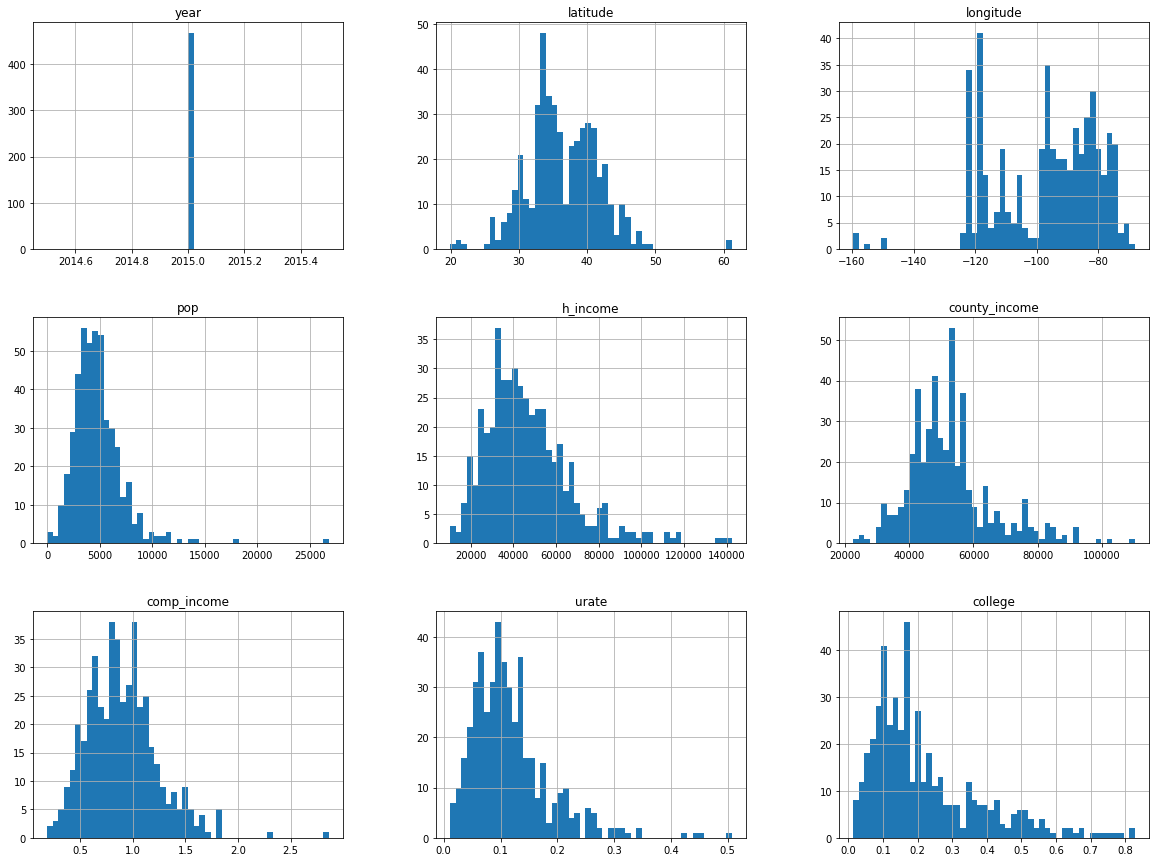

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Drop all null values and convert numerical columns to their correct type

In [ ]:
police = police_drop[pd.to_numeric(police_drop['age'], errors='coerce').notnull()]
police = police[pd.to_numeric(police['share_white'], errors='coerce').notnull()]
police = police[pd.to_numeric(police['share_black'], errors='coerce').notnull()]
police = police[pd.to_numeric(police['share_hispanic'], errors='coerce').notnull()]
police = police[pd.to_numeric(police['p_income'], errors='coerce').notnull()]
police['p_income'] = police['p_income'].astype(int)
police = police[pd.to_numeric(police['pov'], errors='coerce').notnull()]
police['pov'] = police['pov'].astype(float)
police['share_white'] = police['share_white'].astype(float)
police['share_black'] = police['share_black'].astype(float)
police['share_hispanic'] = police['share_hispanic'].astype(float)
police['age'] = police['age'].astype(int)

In [ ]:
police.dropna(inplace=True)

In [ ]:
police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 466
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   461 non-null    int64  
 1   gender                461 non-null    object 
 2   raceethnicity         461 non-null    object 
 3   month                 461 non-null    object 
 4   year                  461 non-null    int64  
 5   city                  461 non-null    object 
 6   state                 461 non-null    object 
 7   latitude              461 non-null    float64
 8   longitude             461 non-null    float64
 9   lawenforcementagency  461 non-null    object 
 10  cause                 461 non-null    object 
 11  armed                 461 non-null    object 
 12  pop                   461 non-null    int64  
 13  share_white           461 non-null    float64
 14  share_black           461 non-null    float64
 15  share_hispanic        4

In [ ]:
police['state'].sort_values(ascending=False).head(10)

350    WY
82     WV
181    WV
448    WI
258    WI
2      WI
423    WI
443    WI
339    WA
39     WA
Name: state, dtype: object

Add column grouping the age category

In [ ]:
police['age_cat'] = pd.cut(police['age'],
                       bins=[0.0, 20, 30, 40, 60, 100],
                       labels=['0-20', '21-30', '31-40', '41-60', '61+'])

In [ ]:
police['age_cat']

0       0-20
1      21-30
2      21-30
3      21-30
4      21-30
       ...  
462     0-20
463    21-30
464    41-60
465    31-40
466    41-60
Name: age_cat, Length: 461, dtype: category
Categories (5, object): ['0-20' < '21-30' < '31-40' < '41-60' < '61+']

#Plot 1: Distribution of Deaths by Age

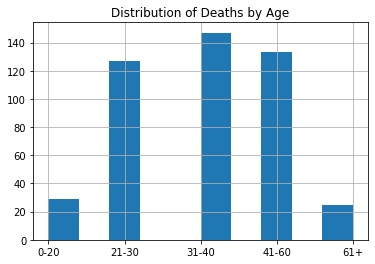

In [ ]:
police['age_cat'].hist();
plt.title("Distribution of Deaths by Age");

#Relationship between Poverty and Age for all States

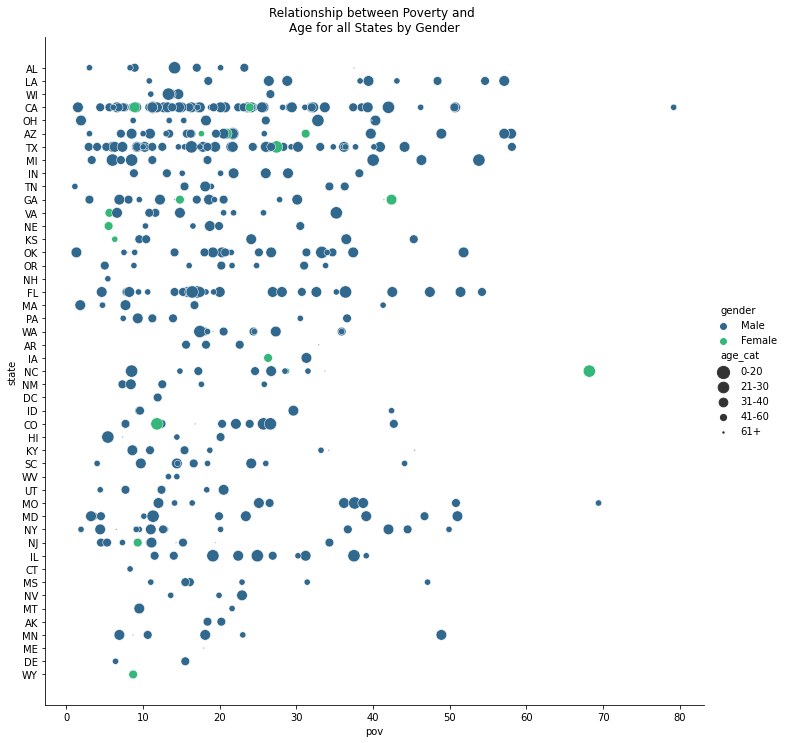

In [ ]:
sns.relplot(
    data=police,
    y="state",
    x="pov",
    size="age_cat",
    sizes=(2,150),
    height=10,
    hue="gender",
    palette="viridis"
)
plt.title("Relationship between Poverty and \nAge for all States by Gender");

In [ ]:
police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 466
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   461 non-null    int64   
 1   gender                461 non-null    object  
 2   raceethnicity         461 non-null    object  
 3   month                 461 non-null    object  
 4   year                  461 non-null    int64   
 5   city                  461 non-null    object  
 6   state                 461 non-null    object  
 7   latitude              461 non-null    float64 
 8   longitude             461 non-null    float64 
 9   lawenforcementagency  461 non-null    object  
 10  cause                 461 non-null    object  
 11  armed                 461 non-null    object  
 12  pop                   461 non-null    int64   
 13  share_white           461 non-null    float64 
 14  share_black           461 non-null    float64 
 15  share_

# Is There a Relationship between Unemployment Rate, Income Level and Race?

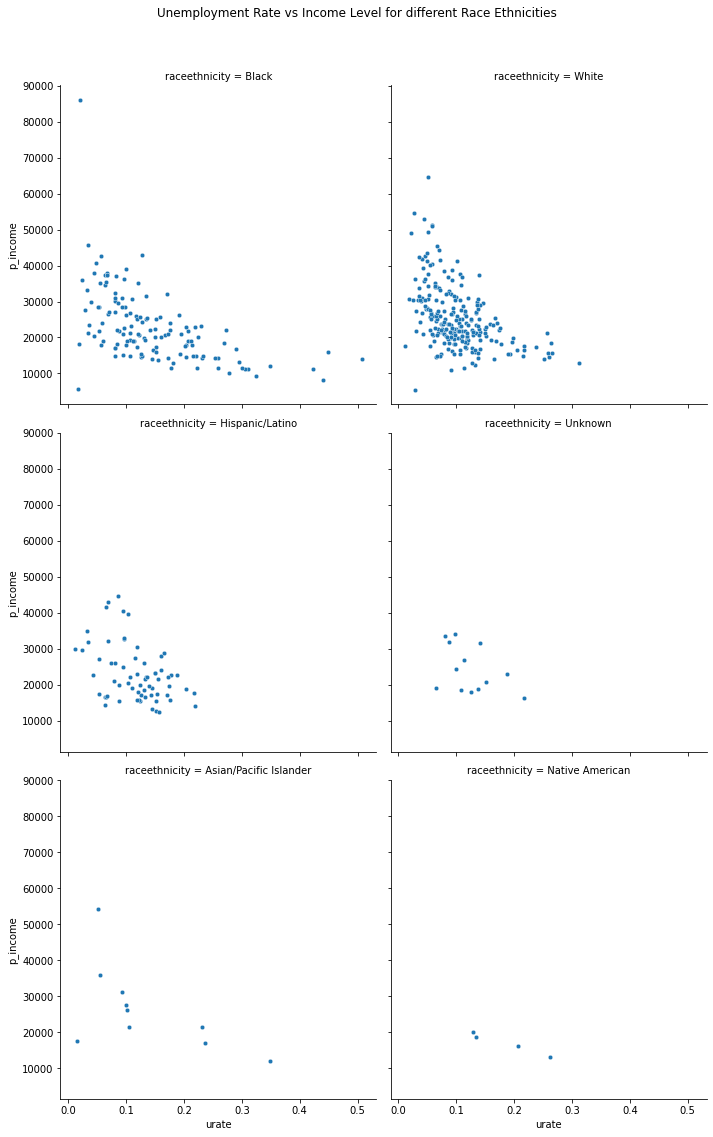

In [ ]:
g=sns.relplot(
    data=police,
    x="urate",
    y="p_income",
    col="raceethnicity",
    col_wrap=2, #number of plots per row
    height=5,
    s=20
)
g.fig.suptitle("Unemployment Rate vs Income Level for different Race Ethnicities", y=1.05);

#Population Proportion of Deaths by Arm

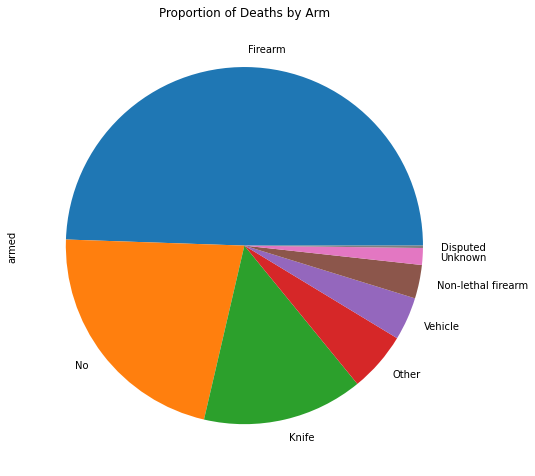

In [ ]:
p3 = police.armed.value_counts().plot(kind='pie', figsize=(8,10))
p3.set_title("Proportion of Deaths by Arm");
p3;

#Box Plot: College Education per Race/Ethnicity

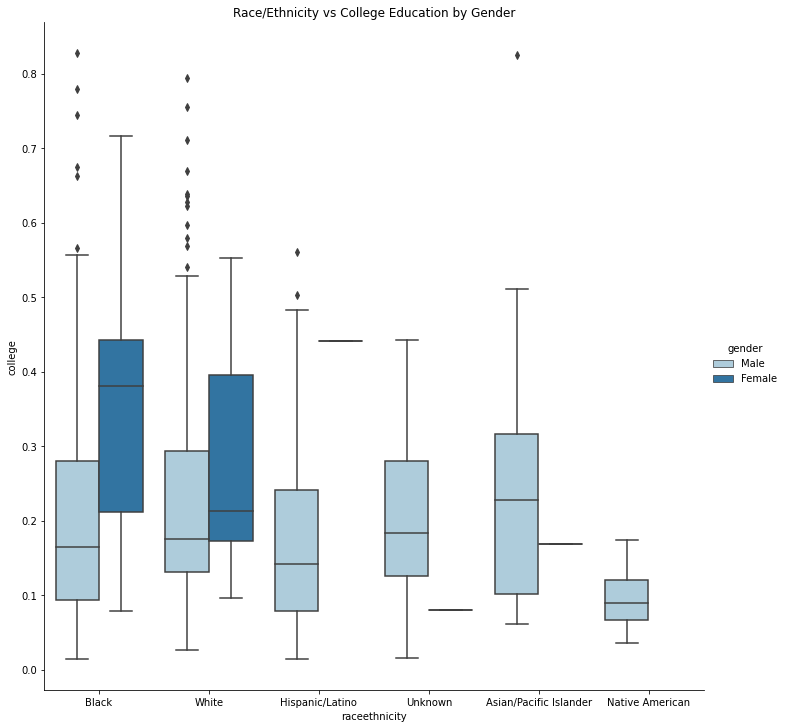

In [ ]:
sns.catplot(
    data=police, 
    x="raceethnicity",
    y="college",
    hue='gender',
    aspect=1, 
    kind="box",
    height=10,
    palette="Paired"
    ) 

plt.title('Race/Ethnicity vs College Education by Gender');

#Machine Learning Applications

In [ ]:
#creating a test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(police, test_size=0.2, random_state=42)

In [ ]:
police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 466
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   461 non-null    int64   
 1   gender                461 non-null    object  
 2   raceethnicity         461 non-null    object  
 3   month                 461 non-null    object  
 4   year                  461 non-null    int64   
 5   city                  461 non-null    object  
 6   state                 461 non-null    object  
 7   latitude              461 non-null    float64 
 8   longitude             461 non-null    float64 
 9   lawenforcementagency  461 non-null    object  
 10  cause                 461 non-null    object  
 11  armed                 461 non-null    object  
 12  pop                   461 non-null    int64   
 13  share_white           461 non-null    float64 
 14  share_black           461 non-null    float64 
 15  share_

In [ ]:
police_ml=police.reset_index()
police_ml

,index,age,gender,raceethnicity,month,year,city,state,latitude,longitude,...,share_black,share_hispanic,p_income,h_income,county_income,comp_income,pov,urate,college,age_cat
0,0,16,Male,Black,February,2015,Millbrook,AL,32.529577,-86.362829,...,30.5,5.6,28375,51367.0,54766,0.937936,14.1,0.097686,0.168510,0-20
1,1,27,Male,White,April,2015,Pineville,LA,31.321739,-92.434860,...,36.2,0.5,14678,27972.0,40930,0.683411,28.8,0.065724,0.111402,21-30
2,2,26,Male,White,March,2015,Kenosha,WI,42.583560,-87.835710,...,7.7,16.8,25286,45365.0,54930,0.825869,14.6,0.166293,0.147312,21-30
3,3,25,Male,Hispanic/Latino,March,2015,South Gate,CA,33.939298,-118.219463,...,0.6,98.8,17194,48295.0,55909,0.863814,11.7,0.124827,0.050133,21-30
4,4,29,Male,White,March,2015,Munroe Falls,OH,41.148575,-81.429878,...,1.4,1.7,33954,68785.0,49669,1.384868,1.9,0.063550,0.403954,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,462,18,Male,Black,April,2015,Portsmouth,VA,36.829014,-76.341438,...,53.8,0.0,25262,27418.0,46166,0.593900,35.2,0.152047,0.120553,0-20
457,463,28,Male,Native American,April,2015,Tonasket,WA,48.708542,-119.436829,...,0.4,20.2,18470,35608.0,40368,0.882085,27.3,0.133650,0.174525,21-30
458,464,52,Male,White,March,2015,Gaston,NC,35.205776,-81.240669,...,10.1,0.3,21175,38200.0,42017,0.909156,28.5,0.256150,0.072764,41-60
459,465,38,Female,Black,February,2015,Oakland,CA,37.827129,-122.284492,...,24.9,37.1,26971,63052.0,72112,0.874362,23.9,0.069601,0.396476,31-40


In [ ]:
police_ml.drop(columns="index", inplace=True)

In [ ]:
police_ml.armed.unique()

array(['No', 'Firearm', 'Non-lethal firearm', 'Other', 'Knife', 'Vehicle',
       'Unknown', 'Disputed'], dtype=object)

Convert armed category to a numerical value

In [ ]:
police_ml["is_armed"] = df.armed.apply(lambda x: 0 if x=='No' else 1)

In [ ]:
police_ml["is_armed"].value_counts()

1    360
0    101
Name: is_armed, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(police_ml, police_ml["age_cat"]):
    strat_train_set = police_ml.loc[train_index]
    strat_test_set = police_ml.loc[test_index]

strat_test_set["age_cat"].value_counts() / len(strat_test_set)

31-40    0.322581
41-60    0.290323
21-30    0.268817
0-20     0.064516
61+      0.053763
Name: age_cat, dtype: float64

In [ ]:
def pov_age_proportions(data):
    return data["age_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(police_ml, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": pov_age_proportions(police_ml),
    "Stratified": pov_age_proportions(strat_test_set),
    "Random": pov_age_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0-20,0.062907,0.064516,0.064516,2.558398,2.558398
21-30,0.275488,0.268817,0.344086,24.900516,-2.421472
31-40,0.318872,0.322581,0.236559,-25.813766,1.163046
41-60,0.288503,0.290323,0.301075,4.357668,0.630609
61+,0.054230,0.053763,0.053763,-0.860215,-0.860215


In [ ]:
police_ml['pov'].max()

79.2

In [ ]:
police_ml['pov_cat'] = pd.cut(police_ml['pov'],
                       bins=[0.0, 20, 30, 40, 60, 80],
                       labels=['0-20', '21-30', '31-40', '41-60', '61+'])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(police_ml, police_ml["pov_cat"]):
    strat_train_set2 = police_ml.loc[train_index]
    strat_test_set2 = police_ml.loc[test_index]

strat_test_set2["pov_cat"].value_counts() / len(strat_test_set2)

0-20     0.548387
21-30    0.215054
31-40    0.139785
41-60    0.086022
61+      0.010753
Name: pov_cat, dtype: float64

In [ ]:
def pov_cat_proportions(data):
    return data["pov_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(police_ml, test_size=0.2, random_state=42)

compare_props2 = pd.DataFrame({
    "Overall": pov_cat_proportions(police_ml),
    "Stratified": pov_cat_proportions(strat_test_set2),
    "Random": pov_cat_proportions(test_set),
}).sort_index()
compare_props2["Rand. %error"] = 100 * compare_props2["Random"] / compare_props2["Overall"] - 100
compare_props2["Strat. %error"] = 100 * compare_props2["Stratified"] / compare_props2["Overall"] - 100


In [ ]:
compare_props2

,Overall,Stratified,Random,Rand. %error,Strat. %error
0-20,0.550976,0.548387,0.505376,-8.276183,-0.469901
21-30,0.210412,0.215054,0.225806,7.316262,2.205964
31-40,0.145336,0.139785,0.161290,10.977371,-3.819612
41-60,0.086768,0.086022,0.096774,11.532258,-0.860215
61+,0.006508,0.010753,0.010753,65.232975,65.232975


large error in the stratified sampling for the 61+ age cat. We will therefore use the initial stratified sampling sets.

In [ ]:
for set_ in (strat_train_set2, strat_test_set2):
    set_.drop("pov_cat", axis=1, inplace=True)

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

In [ ]:
police_ml_copy = strat_train_set.copy()

In [ ]:
corr_matrix = police_ml_copy.corr()

In [ ]:
corr_matrix

,age,year,latitude,longitude,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,pov,urate,college,is_armed
age,1.000000,NaN,0.016977,0.017262,0.003413,0.197097,-0.104121,-0.134304,-0.007508,0.016725,-0.054532,0.054523,-0.081103,-0.076447,-0.043414,0.018646
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.016977,NaN,1.000000,-0.053268,-0.072375,0.225705,-0.061912,-0.230993,0.002421,0.015616,0.207678,-0.118275,-0.037518,0.066945,-0.017492,-0.031625
longitude,0.017262,NaN,-0.053268,1.000000,-0.015960,0.178505,0.395894,-0.419940,0.025067,-0.066220,-0.160339,0.017938,-0.011452,0.029507,0.048400,0.069976
pop,0.003413,NaN,-0.072375,-0.015960,1.000000,0.062202,-0.148891,0.047852,0.199750,0.339330,0.175428,0.279180,-0.301356,-0.212157,0.120633,-0.047864
share_white,0.197097,NaN,0.225705,0.178505,0.062202,1.000000,-0.504203,-0.625835,0.313183,0.283990,-0.151631,0.441324,-0.478867,-0.357689,0.308914,-0.017414
share_black,-0.104121,NaN,-0.061912,0.395894,-0.148891,-0.504203,1.000000,-0.268286,-0.223601,-0.303769,-0.082580,-0.331743,0.380870,0.451191,-0.178397,0.064361
share_hispanic,-0.134304,NaN,-0.230993,-0.419940,0.047852,-0.625835,-0.268286,1.000000,-0.240856,-0.170063,0.115445,-0.252234,0.262463,0.036857,-0.297786,0.015967
p_income,-0.007508,NaN,0.002421,0.025067,0.199750,0.313183,-0.223601,-0.240856,1.000000,0.805692,0.334405,0.684575,-0.676494,-0.475242,0.678484,0.048472
h_income,0.016725,NaN,0.015616,-0.066220,0.339330,0.283990,-0.303769,-0.170063,0.805692,1.000000,0.484529,0.787083,-0.753567,-0.488488,0.641662,-0.011256


In [ ]:
corr_matrix["is_armed"].sort_values(ascending=False)

is_armed          1.000000
urate             0.082631
longitude         0.069976
share_black       0.064361
county_income     0.054884
p_income          0.048472
college           0.019895
age               0.018646
share_hispanic    0.015967
pov               0.015232
h_income         -0.011256
share_white      -0.017414
latitude         -0.031625
comp_income      -0.046844
pop              -0.047864
year                   NaN
Name: is_armed, dtype: float64

urate has the strongest correlation

In [ ]:
police_ml_copy = strat_train_set.drop("is_armed", axis=1) # drop labels for training set
police_labels = strat_train_set["is_armed"].copy()

check for incomplete rows

In [ ]:
sample_incomplete_rows = police_ml_copy[police_ml_copy.isnull().any(axis=1)].head()
sample_incomplete_rows

,age,gender,raceethnicity,month,year,city,state,latitude,longitude,lawenforcementagency,...,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,pov,urate,college


In [ ]:
police_ml_copy.describe()

,age,year,latitude,longitude,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,pov,urate,college
count,368.000000,368.0,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,37.190217,2015.0,36.302970,-97.839630,4852.945652,51.980163,16.848098,23.364130,24141.836957,46325.904891,52516.312500,0.891054,21.112500,0.116179,0.220976
std,12.804832,0.0,5.117327,16.715772,2453.085811,29.785929,23.796104,25.386595,8817.703665,19225.733600,12757.946292,0.308241,13.047353,0.067036,0.155655
min,16.000000,2015.0,19.915194,-159.642700,678.000000,0.000000,0.000000,0.000000,5457.000000,10290.000000,22545.000000,0.184049,1.500000,0.011335,0.013547
25%,28.000000,2015.0,33.354019,-112.201316,3402.000000,26.500000,1.400000,3.675000,18339.000000,32708.000000,43919.500000,0.644579,10.900000,0.069163,0.110242
50%,35.000000,2015.0,35.452811,-95.476101,4427.000000,56.650000,6.350000,13.200000,22167.500000,43336.000000,50877.000000,0.871602,18.400000,0.104946,0.170703
75%,45.000000,2015.0,39.797437,-83.241787,5866.250000,76.975000,22.475000,35.925000,28506.500000,56031.250000,56853.000000,1.073158,28.225000,0.140160,0.284620
max,83.000000,2015.0,61.218408,-68.100007,26826.000000,99.400000,99.400000,97.100000,86023.000000,138750.000000,110292.000000,1.821138,79.200000,0.448075,0.828070


In [ ]:
police_num= police_ml_copy[["age","year","latitude","longitude", "pop","share_white", "share_black", "share_hispanic" , "p_income","h_income","county_income", "comp_income", "pov","urate","college"]]

num_attribs=list(police_num)
print(num_attribs)
                           

['age', 'year', 'latitude', 'longitude', 'pop', 'share_white', 'share_black', 'share_hispanic', 'p_income', 'h_income', 'county_income', 'comp_income', 'pov', 'urate', 'college']


Initialise the numerical pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), 
        ('std_scaler', StandardScaler()),              
    ])

police_num_tr = num_pipeline.fit_transform(police_num)


In [ ]:
police_num_tr

array([[-0.95329749,  0.        ,  1.19031384, ...,  1.93309651,
         2.11945681, -0.99966427],
       [ 1.31455601,  0.        ,  1.94400917, ...,  1.13491473,
         0.23249786, -1.05323893],
       [ 0.37613387,  0.        , -0.03558742, ...,  0.98909306,
        -0.74319381,  0.40893703],
       ...,
       [-0.95329749,  0.        , -0.56018448, ..., -0.0470083 ,
        -0.84256226,  1.91113625],
       [-0.24948088,  0.        , -0.29318176, ..., -0.3847006 ,
        -0.28843976, -0.61370454],
       [-0.24948088,  0.        ,  0.55441697, ...,  1.85634827,
         2.12702896, -1.18687167]])

Initialise the full pipeline -> don't include the less useful categorical variables

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ['gender', 'raceethnicity', 'month', 'cause', 'armed']

print(cat_attribs)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

police_prepared = full_pipeline.fit_transform(police_ml_copy)

['gender', 'raceethnicity', 'month', 'cause', 'armed']


In [ ]:
cat_encoder = OneHotEncoder()
police_cat=police_ml_copy[['gender', 'raceethnicity', 'month', 'cause', 'armed']]

cat_encoder = OneHotEncoder()
police_cat_1hot = cat_encoder.fit_transform(police_cat)


In [ ]:
police_labels

69     1
396    0
365    1
322    0
16     1
      ..
393    1
85     1
319    1
183    0
366    1
Name: is_armed, Length: 368, dtype: int64

In [ ]:
police_prepared

array([[-0.95329749,  0.        ,  1.19031384, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.31455601,  0.        ,  1.94400917, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37613387,  0.        , -0.03558742, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.95329749,  0.        , -0.56018448, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24948088,  0.        , -0.29318176, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24948088,  0.        ,  0.55441697, ...,  0.        ,
         0.        ,  0.        ]])

Number of features: When we included all columns we had 694 features, this was excessive and caused issues in the final predictions of the ML Models

In [ ]:
len(police_prepared[0])

42

In [ ]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(police_prepared, police_labels)

LinearRegression()

In [ ]:
some_data = police_ml_copy.iloc[:5]
some_labels = police_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [0.86452957 0.6033517  0.73111603 0.53333754 1.09021216]


In [ ]:
print("Labels:", list(some_labels))

Labels: [1, 0, 1, 0, 1]


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

police_predictions = lin_reg.predict(police_prepared)


lin_mse = mean_squared_error(police_labels, police_predictions)

lin_rmse = np.sqrt(lin_mse)
print("lin_rmse:", lin_rmse)

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(police_labels, police_predictions)
print("lin_mae:", lin_mae)

lin_rmse: 0.37889301743314047
lin_mae: 0.29894267767978866


Appears to be a good prediction. We will need to perform CV to confirm this.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(police_prepared, police_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
police_predictions = tree_reg.predict(police_prepared)
tree_mse = mean_squared_error(police_labels, police_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Overfitting likely in this case

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, police_prepared, police_labels, 
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [0.5694948  0.61512469 0.51987524 0.51987524 0.46499055 0.46499055
 0.61512469 0.63671454 0.60092521 0.60092521]
Mean: 0.5608040732802294
Standard deviation: 0.06055542552464879


In [ ]:
lin_scores = cross_val_score(lin_reg, police_prepared, police_labels, 
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [0.42204617 0.42466208 0.34134825 0.42484758 0.51760427 0.33672683
 0.47479936 0.50866651 0.49121457 0.4099379 ]
Mean: 0.43518535038172673
Standard deviation: 0.060355665927897977


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(police_prepared, police_labels)
police_predictions = forest_reg.predict(police_prepared)
forest_mse = mean_squared_error(police_labels, police_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.19280537607514542

In [ ]:
forest_scores = cross_val_score(forest_reg, police_prepared, police_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.46031716 0.45678074 0.37126519 0.41099747 0.4871317  0.33206968
 0.50430578 0.56448972 0.50853821 0.43969687]
Mean: 0.4535592527782487
Standard deviation: 0.065285775230634


Linear and Random Forest Regression have the best results from the 10 fold CV. We will fine tune RF as we will have control of the parameters.

In [ ]:
#gridsearch 1
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
 
grid_search_1 = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_1.fit(police_prepared, police_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [5, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search_1.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [ ]:
grid_search_1.best_params_

{'max_features': 4, 'n_estimators': 30}

In [ ]:
cvres = grid_search_1.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4623299491256984 {'max_features': 2, 'n_estimators': 5}
0.4443603575480569 {'max_features': 2, 'n_estimators': 10}
0.42672039531199735 {'max_features': 2, 'n_estimators': 30}
0.47224169415369205 {'max_features': 4, 'n_estimators': 5}
0.4434182793428648 {'max_features': 4, 'n_estimators': 10}
0.4211568743815851 {'max_features': 4, 'n_estimators': 30}
0.47518814839926177 {'max_features': 6, 'n_estimators': 5}
0.45705583578303066 {'max_features': 6, 'n_estimators': 10}
0.4359252362889207 {'max_features': 6, 'n_estimators': 30}
0.4568099226619632 {'max_features': 8, 'n_estimators': 5}
0.4410998169355269 {'max_features': 8, 'n_estimators': 10}
0.431308314873383 {'max_features': 8, 'n_estimators': 30}
0.4876145043896793 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.4491833059617014 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.5110124621535195 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.45702464820106786 {'bootstrap': False, 'max_features': 3

Results indicate that we need to increase the maxmimum n_estimators

In [ ]:
#grid_search2
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [20, 30, 40], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [20, 30], 'max_features': [2, 4, 8]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
 
grid_search2 = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search2.fit(police_prepared, police_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [20, 30, 40]},
                         {'bootstrap': [False], 'max_features': [2, 4, 8],
                          'n_estimators': [20, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search2.best_params_

{'max_features': 4, 'n_estimators': 30}

In [ ]:
grid_search2.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [ ]:
cvres = grid_search2.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4328415577817246 {'max_features': 2, 'n_estimators': 20}
0.42672039531199735 {'max_features': 2, 'n_estimators': 30}
0.4267044192666578 {'max_features': 2, 'n_estimators': 40}
0.42516423204833953 {'max_features': 4, 'n_estimators': 20}
0.4211568743815851 {'max_features': 4, 'n_estimators': 30}
0.4234138574794932 {'max_features': 4, 'n_estimators': 40}
0.443263368575354 {'max_features': 6, 'n_estimators': 20}
0.4359252362889207 {'max_features': 6, 'n_estimators': 30}
0.43052235735803157 {'max_features': 6, 'n_estimators': 40}
0.4335305325986833 {'max_features': 8, 'n_estimators': 20}
0.431308314873383 {'max_features': 8, 'n_estimators': 30}
0.431063847191369 {'max_features': 8, 'n_estimators': 40}
0.4403287326730735 {'bootstrap': False, 'max_features': 2, 'n_estimators': 20}
0.43561059698846516 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
0.4278015444358466 {'bootstrap': False, 'max_features': 4, 'n_estimators': 20}
0.4275699666140303 {'bootstrap': False, 'max_features'

Second trial confirms to us that the best parameters are max_features = 4 and n_estimators = 30

In [ ]:
feature_importances = grid_search2.best_estimator_.feature_importances_
feature_importances

array([0.04333484, 0.        , 0.05923297, 0.05772438, 0.0709577 ,
       0.06110503, 0.05331674, 0.05543026, 0.07258074, 0.05592403,
       0.06108211, 0.05704788, 0.06051095, 0.06436054, 0.06022052,
       0.00250059, 0.00156522, 0.00814923, 0.01571836, 0.00949198,
       0.00134968, 0.0020816 , 0.00846532, 0.01222063, 0.01099633,
       0.00550913, 0.        , 0.00947845, 0.00657595, 0.00477971,
       0.00803615, 0.0014143 , 0.00423016, 0.00150524, 0.00623569,
       0.01283907, 0.01149338, 0.00591819, 0.00350317, 0.00589406,
       0.00107238, 0.00614733])

In [ ]:
catencoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(catencoder.categories_[0]) + list(catencoder.categories[1]) + list(catencoder.categories[2]) + list(catencoder.categories[3])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.07258074223253226, 'p_income'),
 (0.07095770234826665, 'pop'),
 (0.06436054059542781, 'urate'),
 (0.06110503407647296, 'share_white'),
 (0.061082112705526694, 'county_income'),
 (0.060510952872888865, 'pov'),
 (0.06022052157130164, 'college'),
 (0.05923297266511199, 'latitude'),
 (0.05772437611099794, 'longitude'),
 (0.057047875066928086, 'comp_income'),
 (0.055924028436040225, 'h_income'),
 (0.055430261107267335, 'share_hispanic'),
 (0.05331673520286823, 'share_black'),
 (0.043334843745080495, 'age'),
 (0.015718363649790186, 't'),
 (0.00949197587727048, 'o'),
 (0.008149230200414938, 'u'),
 (0.0025005933303212245, 'Female'),
 (0.0015652195666951115, 'Male'),
 (0.0, 'year')]

## Final Predictions

In [ ]:
final_model = grid_search2.best_estimator_

X_test = strat_test_set.drop("is_armed", axis=1)
y_test = strat_test_set["is_armed"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

0.4454603085566689

## ROC Curve

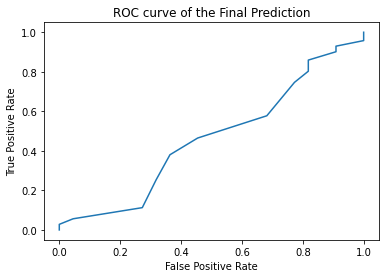

In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  final_predictions)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC curve of the Final Prediction");
plt.show()

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = np.where(final_predictions>.5, 1, 0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.05      0.07        22
           1       0.76      0.94      0.84        71

    accuracy                           0.73        93
   macro avg       0.48      0.49      0.46        93
weighted avg       0.63      0.73      0.66        93



## Precision-Recall Curve

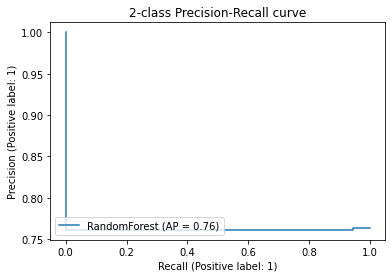

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="RandomForest")
_ = display.ax_.set_title("2-class Precision-Recall curve")